<a href="https://colab.research.google.com/github/gilsu200/DL_study/blob/main/midterm_practice_ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/master/chapter02_mathematical-building-blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</td></tr></table>

# 신경망의 수학적 구성 요소

## 신경망과의 첫 만남

**케라스에서 MNIST 데이터셋 적재하기**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**신경망 구조**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**컴파일 단계**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**이미지 데이터 준비하기**

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

# - We normalized data by dividing 255. What happens if we do not normalize?

요약하면, 정규화는 머신 러닝 모델, 특히 신경망의 훈련 안정성, 수렴 속도 및 일반화 성능을 향상시키는 데 도움이 되는 일반적인 전처리 단계입니다.

정규화를 하지 않으면 입력 데이터의 값 범위가 너무 커서 모델이 더 느리게 수렴하거나 학습하지 못할 수 있습니다. 또한, 특정 가중치 및 편향 값들이 매우 커지는 문제가 발생할 수 있습니다. 이는 모델의 안정성을 해치고, 과적합(Overfitting)을 유발할 수 있습니다.








**모델 훈련**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 0.2653 - accuracy: 0.9233
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1074 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0705 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0520 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0386 - accuracy: 0.9890


- What epoch mean?

에포크의 횟수는 훈련 과정의 중요한 하이퍼파라미터 중 하나이며, 적절한 에포크 수를 선택하는 것은 모델의 성능과 훈련 시간에 큰 영향을 미칩니다. 에포크가 너무 적으면 모델이 충분히 학습되지 않을 수 있고, 에포크가 너무 많으면 과적합(overfitting)의 위험이 있을 수 있습니다. 적절한 에포크 수는 모델과 데이터에 따라 다르며, 실험과 경험을 통해 조정될 수 있습니다.

- If you specify batch_size = 100, how many updates do we have in one epoch?

배치 크기가 100이고 한 에포크에서는 총 600개의 배치가 있으므로, 모델 매개변수의 업데이트 횟수는 600입니다.

한 epoch마다 모든배치를 업데이트함 600번

**모델을 사용해 예측 만들기**

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 66ms/step


array([4.8381770e-09, 9.3090362e-09, 2.7714448e-06, 1.7304126e-05,
       3.7330829e-12, 3.0401648e-09, 3.5047919e-13, 9.9997973e-01,
       2.8447451e-08, 1.4424451e-07], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.9965456

In [ ]:
test_labels[0]

7

**새로운 데이터에서 모델 평가하기**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0696 - accuracy: 0.9780
테스트 정확도: 0.9779999852180481


## 신경망을 위한 데이터 표현

### 스칼라 (랭크-0 텐서)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### 벡터 (랭크-1 텐서)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### 행렬 (랭크-2 텐서)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### 랭크-3 텐서와 더 높은 랭크의 텐서

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

- Try to create a 3D tensor object. (with any values you like)



In [ ]:
x=np.array([[[1,2,3],
             [4,5,6],
             [7,8,9]],
            [[3,2,1],
             [6,5,4],
             [9,8,7]],
            [[1,2,3],
             [4,5,6],
             [7,8,9]]])
x.ndim


3

### 핵심 속성

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

- How many samples in Mnist test dataset?
10000
- What is a dimension for minst data? 2차원

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')

**다섯 번째 이미지 출력하기**

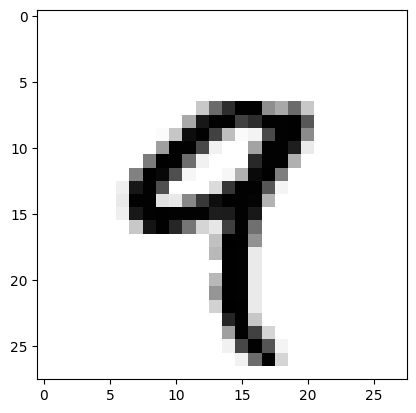

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9

- Try to visualize the 1st digit from mnist test dataset (1
st digit data = test_images[0] )

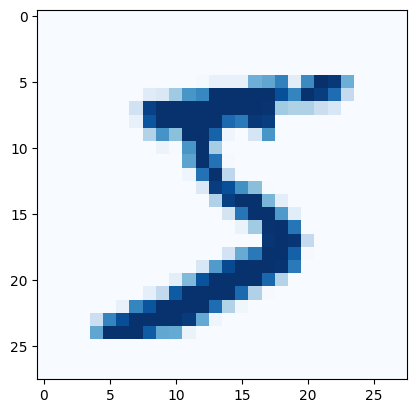

In [ ]:
import matplotlib.pyplot as plt
digit=train_images[0]
plt.imshow(digit,cmap=plt.cm.Blues)
plt.show()

- Try to manipulate and visualize the 1st digit data

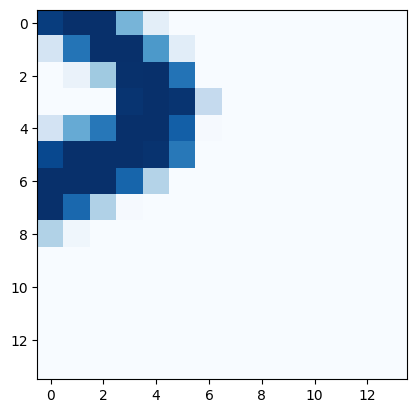

In [ ]:
mani_data=train_images[0,14:,14:]
import matplotlib.pyplot as plt
digit=mani_data
plt.imshow(digit,cmap=plt.cm.Blues)
plt.show()

### 넘파이로 텐서 조작하기

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

### 배치 데이터

In [ ]:
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [ ]:
batch = train_images[128:256]
batch.shape

(128, 28, 28)

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]
batch.shape

(128, 28, 28)

### 텐서의 실제 사례

### 벡터 데이터

### 시계열 데이터 또는 시퀀스 데이터

### 이미지 데이터

### 비디오 데이터

## 신경망의 톱니바퀴: 텐서 연산

### 원소별 연산

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

- Why we use x.copy() ?

 x.copy()를 사용하여 배열의 새로운, 독립적인 복사본을 만들어 원본 데이터를 변경하지 않거나 의도하지 않은 부작용을 피할 수 있습니다.

- Why the naïve version of the code slower?

원시 버전의 코드가 느린 이유는 주로 최적화되지 않은 구현 때문입니다. 이 구현은 반복문을 사용하여 각 요소를 개별적으로 처리하기 때문에 성능이 저하될 수 있습니다. 특히 대규모 데이터셋이나 고차원 배열의 경우 반복문을 사용하여 각 요소를 처리하는 것은 많은 계산 및 메모리 액세스를 필요로 하므로 효율적이지 않습니다.

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.01 s


In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 1.67 s


### 브로드캐스팅

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

- Try to use broadcasting with your own example.

In [ ]:
import numpy as np
A = np.array([[1, 2, 3],
              [4, 5, 6]])
B = np.array([10, 20, 30])
result = A + B
result

array([[11, 22, 33],
       [14, 25, 36]])

### 텐서 곱셈

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z
naive_vector_dot(x,y)

8.477472505379287

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z
naive_matrix_vector_dot(x,y)

AssertionError: 

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z
naive_matrix_vector_dot(x,y)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### 텐서 크기 변환

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### 텐서 연산의 기하학적 해석

### 딥러닝의 기하학적 해석

## 신경망의 엔진: 그레이디언트 기반 최적화

### 도함수란?

### 텐서 연산의 도함수: 그레이디언트

### 확률적 경사 하강법

### 도함수 연결: 역전파 알고리즘

#### 연쇄 법칙

#### 계산 그래프를 활용한 자동 미분

#### 텐서플로의 그레이디언트 테이프

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [ ]:
x = tf.Variable(tf.zeros((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.33760846, 0.33760846],
        [0.55850565, 0.55850565]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## 첫 번째 예제 다시 살펴보기

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2661 - accuracy: 0.9224
Epoch 2/5
469/469 [==============================] - 4s 10ms/step - loss: 0.1066 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0704 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0512 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 6s 14ms/step - loss: 0.0386 - accuracy: 0.9887


- Check weights from defined models.

In [ ]:
weights = model.get_weights()
for i, layer_weights in enumerate(weights):
    print("Layer", i)
    print(layer_weights)

### 텐서플로를 사용해 첫 번째 예제를 밑바닥부터 다시 구현하기

#### 단순한 Dense 클래스

In [1]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### 단순한 Sequential 클래스

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### 배치 제너레이터

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### 훈련 스텝 실행하기

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
#직접 경사하강법 구현
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
#keras optimizer 사용
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### 전체 훈련 루프

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

In [ ]:
model.weights

### 모델 평가하기

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean():.2f}")

정확도: 0.81


## 요약

학습Learning은 훈련 데이터 샘플과 그에 상응하는 타깃이 주어졌을 때 손실 함수를 최소화하는 모델 파라미터의 조합을 찾는 것을 의미합니다.

데이터 샘플과 타깃의 배치를 랜덤하게 뽑고 이 배치에서 손실에 대한 파라미터의 그래디언트를 계산함으로써 학습이 진행됩니다. 네트워크의 파라미터는 그래디언트의 반대 방향으로 조금씩(학습률에 의해 정의된 크기만큼) 움직입니다.

전체 학습 과정은 신경망이 미분 가능한 텐서 연산으로 연결되어 있기 때문에 가능합니다. 현재 파라미터와 배치 데이터를 그래디언트 값에 매핑해 주는 그래디언트 함수를 구성하기 위해 미분의 연쇄 법칙을 사용합니다.

이어지는 장에서 자주 보게 될 두 가지 핵심 개념은 손실과 옵티마이저입니다. 이 두 가지는 네트워크에 데이터를 주입하기 전에 정의되어야 합니다.

손실은 훈련하는 동안 최소화해야 할 양이므로 해결하려는 문제의 성공을 측정하는 데 사용합니다.

옵티마이저는 손실에 대한 그래디언트가 파라미터를 업데이트하는 정확한 방식을 정의합니다. 예를 들어 RMSProp 옵티마이저, 모멘텀을 사용한 SGD 등입니다.


참고 : tensorflow.blog